In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from mpl_toolkits.mplot3d import axes3d

In [2]:
df = pd.read_csv('prepared_dataset/60_mV_OCO_sequences.csv')
df.head()

,o1,c,o2
0,0.197674,0.338843,0.029517
1,0.029517,0.024793,0.228980
2,0.228980,0.008264,0.025939
3,0.025939,0.132231,0.072451
4,0.072451,0.024793,0.002683


In [3]:
df.corr()

,o1,c,o2
o1,1.000000,-0.057331,0.102593
c,-0.057331,1.000000,-0.032705
o2,0.102593,-0.032705,1.000000


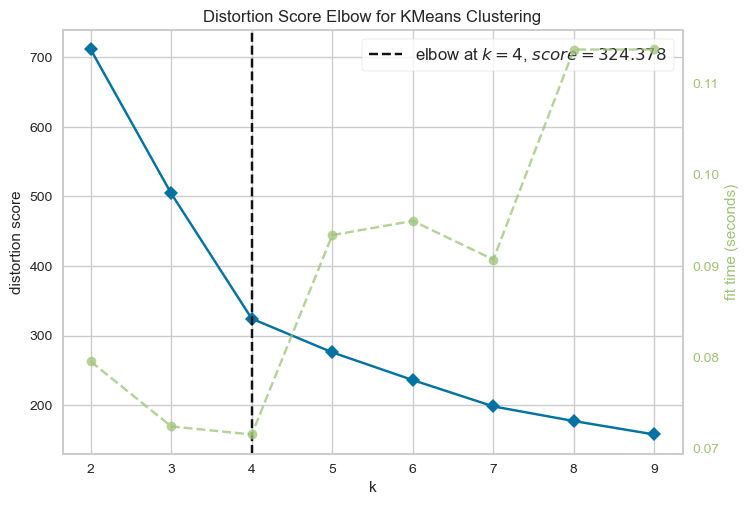

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
model = KMeans(init="k-means++", n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df) 
visualizer.show()

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=4))

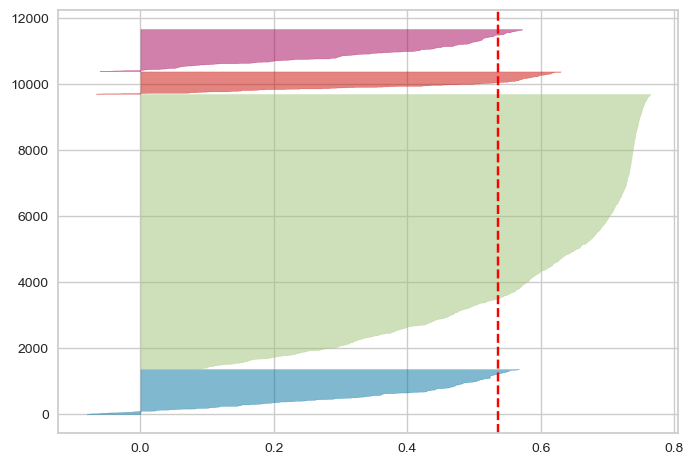

In [5]:
km = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=100)
visualizer = SilhouetteVisualizer(km, colors="yellowbrick")
visualizer.fit(df)

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(df)

In [7]:
kmeans.cluster_centers_

array([[0.07459804, 0.05623215, 0.07641728],
       [0.13038522, 0.05992621, 0.51836248],
       [0.09579864, 0.63541761, 0.09319064],
       [0.50399208, 0.05251709, 0.12972132]])